In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from tabulate import tabulate
from collections import Counter
from statistics import mean
# 
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest, RFE, SelectFromModel 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, confusion_matrix, auc, roc_curve, recall_score, precision_score, RocCurveDisplay
# 
from skrebate import ReliefF
# 
# from chefboost import Chefboost as chef
# from C45algorithm import *
# 
# 

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
# Risk of brain tumor
# 
# df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv')
df = pd.read_csv('risk_of_brain_tumor.csv').drop(['Patient Id', 'Unnamed: 0'], axis=1) # Risk of Brain tumor dataset [https://data.world/seekersoftec/risk-of-brain-tumor/workspace/data-dictionary]
# 
# 

In [4]:
# Preprocessed images
# df = pd.read_csv('bt_dataset_t3.csv').drop(['Image', 'PSNR'], axis=1) # 
# df = pd.read_excel('brain tumor datasets - Copy.xlsx').drop(['Image'], axis=1) #
# 

In [5]:
print('Dimension of Dataframe:', df.shape)
# 


Dimension of Dataframe: (363, 21)


In [6]:
# Target, Class, C-Risk Level
# 
true_cases = df[(df['C-Risk Level'] == 1)].count()['Age']
false_cases = len(df) - df[(df['C-Risk Level'] == 1)].count()['Age']
true_cases_ratio = (true_cases/len(df))*100
false_cases_ratio = (false_cases/len(df))*100
# 
print('Number of True cases: ', true_cases)
print('Number of False cases: ', false_cases)
# 
print('Percentage ratio[True cases]: ', true_cases_ratio)
print('Percentage ratio[False cases]: ', false_cases_ratio)
# 

Number of True cases:  184
Number of False cases:  179
Percentage ratio[True cases]:  50.688705234159784
Percentage ratio[False cases]:  49.311294765840216


In [7]:
df.head(5)


,Age,Gender,Genetic Risk,Occupational Hazards,Headache,Seizure Rate,Convulsion Rate,Blurred Vision,Double Vision,Peripheral Vision Loss,...,Balance Disorder,Nausea,Vomiting,Rate of Memory Lapses,Drowsiness,Personality disorder,Numbness in arms,Numbness in legs,Syncope Rate,C-Risk Level
0,33,1,3,4,2,2,2,2,2,2,...,3,4,4,2,3,3,2,2,4,0
1,35,1,2,4,2,2,6,2,2,2,...,2,4,3,1,4,2,4,2,4,0
2,42,1,4,3,2,1,3,2,2,2,...,1,2,2,3,1,1,1,1,2,0
3,17,1,4,3,8,7,2,7,8,8,...,2,3,1,1,1,2,2,6,2,0
4,22,0,3,4,3,1,5,1,1,1,...,4,2,2,2,3,6,5,1,1,0


In [8]:
df.describe()

,Age,Gender,Genetic Risk,Occupational Hazards,Headache,Seizure Rate,Convulsion Rate,Blurred Vision,Double Vision,Peripheral Vision Loss,...,Balance Disorder,Nausea,Vomiting,Rate of Memory Lapses,Drowsiness,Personality disorder,Numbness in arms,Numbness in legs,Syncope Rate,C-Risk Level
count,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,...,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000
mean,33.369146,0.561983,4.212121,4.426997,3.837466,3.931129,4.022039,2.774105,3.217631,3.228650,...,2.953168,4.264463,3.473829,3.165289,3.504132,3.504132,3.225895,3.325069,3.005510,0.506887
std,12.342324,0.496828,1.938749,1.947385,2.037908,2.234386,1.791496,1.556910,1.844663,1.889212,...,2.068044,2.354384,2.243777,1.762158,2.132842,2.367333,1.694545,1.947971,1.469759,0.500643
min,14.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,25.000000,0.000000,2.500000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,33.000000,1.000000,4.000000,4.000000,4.000000,3.000000,4.000000,2.000000,3.000000,2.000000,...,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,1.000000
75%,39.000000,1.000000,6.000000,7.000000,5.000000,6.000000,6.000000,4.000000,4.000000,5.000000,...,5.000000,7.000000,5.000000,4.000000,4.000000,6.000000,5.000000,5.000000,4.000000,1.000000
max,73.000000,1.000000,7.000000,8.000000,8.000000,9.000000,7.000000,7.000000,8.000000,8.000000,...,8.000000,9.000000,9.000000,7.000000,9.000000,8.000000,7.000000,9.000000,7.000000,1.000000


In [9]:
df.sum()

Age                       12113
Gender                      204
Genetic Risk               1529
Occupational Hazards       1607
Headache                   1393
Seizure Rate               1427
Convulsion Rate            1460
Blurred Vision             1007
Double Vision              1168
Peripheral Vision Loss     1172
Loss of Smell              1172
Balance Disorder           1072
Nausea                     1548
Vomiting                   1261
Rate of Memory Lapses      1149
Drowsiness                 1272
Personality disorder       1272
Numbness in arms           1171
Numbness in legs           1207
Syncope Rate               1091
C-Risk Level                184
dtype: int64

In [10]:
df = df.replace('?', np.nan)
# df = df.replace('inf', np.nan)

In [11]:
df.isna().sum()

Age                       0
Gender                    0
Genetic Risk              0
Occupational Hazards      0
Headache                  0
Seizure Rate              0
Convulsion Rate           0
Blurred Vision            0
Double Vision             0
Peripheral Vision Loss    0
Loss of Smell             0
Balance Disorder          0
Nausea                    0
Vomiting                  0
Rate of Memory Lapses     0
Drowsiness                0
Personality disorder      0
Numbness in arms          0
Numbness in legs          0
Syncope Rate              0
C-Risk Level              0
dtype: int64

In [12]:
df = df.astype('float64')
df.dtypes

Age                       float64
Gender                    float64
Genetic Risk              float64
Occupational Hazards      float64
Headache                  float64
Seizure Rate              float64
Convulsion Rate           float64
Blurred Vision            float64
Double Vision             float64
Peripheral Vision Loss    float64
Loss of Smell             float64
Balance Disorder          float64
Nausea                    float64
Vomiting                  float64
Rate of Memory Lapses     float64
Drowsiness                float64
Personality disorder      float64
Numbness in arms          float64
Numbness in legs          float64
Syncope Rate              float64
C-Risk Level              float64
dtype: object

#### Data Preprocessing

In [13]:
# 
class PreprocessDataFrame:
    """
      Preprocess the dataset. 
        Dataset is evenly distributed both in the training and testing, 
        \rto preserve the dataset proportions for better prediction and reproduceability of results.
    """
    def __init__(self, dataframe, features_size, target_size, test_ratio=0.25):
      self.dataframe = self.clean_null_values(dataframe) # determining the null values in each column and replacing them
      # self.dataframe = dataframe
      self.test_ratio = test_ratio
      self.feature_vector =  self.dataframe.iloc[:, :features_size].values
      # self.feature_vector =  self.dataframe.iloc[:, features_size:].values
      self.target_vector = self.dataframe.iloc[:, target_size:].values
      # self.target_vector = self.dataframe.iloc[:, :target_size].values

    # clean null values
    def clean_null_values(self, dataframe):
      """
        Determining the null values in each column and replacing them using the Mean imputation method
      """
      dataframe = dataframe.replace("?", np.nan)
      dataframe = dataframe.replace("NaN", np.nan)
      dataframe = dataframe.replace("inf", np.inf)
      # 
      indices_to_keep = ~dataframe.isin([np.nan, np.inf, -np.inf]).any(1)
      dataframe = dataframe[indices_to_keep].astype(np.float64)

      for column in dataframe.columns:
        dataframe[column] = dataframe[column].fillna(dataframe[column].mean())
      
        return dataframe

    # MinMax
    def minMaxScaler(self, feature_range=(0, 1), binarize_y=False, classes=[1,2,3,4,5,6], **kwargs):
      """
        Minmax scaler: Transform features by scaling each feature to a given range.
      """
      # Get the feature vector
      X = self.feature_vector

      # Get the target vector
      y = self.target_vector

      # first binarize y; for multiclass problems
      if (binarize_y):
        y = label_binarize(y, classes=classes)

      # splitting the dataset into  training and test set
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_ratio, random_state=42, stratify=y, **kwargs)

      # MinMaxScaling
      mm = MinMaxScaler(feature_range=feature_range)
      
      # feeding the independent data into the scaler
    
      # Standardize the training set
      X_train = mm.fit_transform(X_train)
      # X_train = mm.transform(X_train)

      # Standardize the testing set
      X_test = mm.fit_transform(X_test)
      # X_test = mm.transform(X_test)
      
      return X_train, X_test, y_train, y_test

# 
# 

In [14]:
# df.iloc[:, df.columns.size-13:]
# df.iloc[:, df.columns.size-1:]
# df.iloc[:, :df.columns.size-len(df.columns)+1]
# 
# 

In [15]:
# target = ['C-Risk Level']
# 
X_train, X_test, y_train, y_test = PreprocessDataFrame(dataframe=df, test_ratio=0.20, target_size=df.columns.size-1, features_size=df.columns.size-1).minMaxScaler()
# 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# 
# 

(290, 20) (73, 20) (290, 1) (73, 1)


### Feature Selection

In [16]:
# 
#   FeatureSelection
# 
class FeatureSelection:

    def __init__(self) -> None:
        pass

    def _majority_voting(self, columns_list: list, threshold: int = 2, total_feature_len: int = 5) -> list:
        """
            A simple voting technique used to combine features \n
            from different feature selection algorithms that were chosen by them.
        """
        # flatten the list
        flat_list = []
        for column_list in columns_list:
            flat_list += list(column_list) 
        # 
        # count the  number of duplicates of each feature 
        new_dict = dict(Counter(flat_list))
        # 
        # Get the feature that met the threshold 
        new_features_list = []
        for k in new_dict:
            if(new_dict[k] >= threshold):
                new_features_list.append(k)
                # 
        # 
        return new_features_list[:total_feature_len]

    def get_feature_rankings(self, dataframe_columns: list, algorithm: dict) -> dict:
        """
            Get feature scores from FS algorithm such as:
                - Mutual Info\n
                - Chi-squared\n
                - ReliefF\n

        """ 
        # 
        _emp_dict = {}
        # 
        try:
            # 
            algorithm_keys = list(algorithm.keys())
            # 
            if ('Mutual Info' in algorithm_keys):
                for col in dataframe_columns:
                    _emp_dict[col] = list(algorithm['Mutual Info'].scores_)[dataframe_columns.index(col)]

            elif ('Chi-squared' in algorithm_keys ):
                for col in dataframe_columns:
                    _emp_dict[col] = list(algorithm['Chi-squared'].scores_)[dataframe_columns.index(col)]

            elif ('ReliefF' in algorithm_keys):
                for col in dataframe_columns:
                    _emp_dict[col] = list(algorithm['ReliefF'].feature_importances_)[dataframe_columns.index(col)]
            else:
                pass
        except Exception as e:
            return SystemError(e)

        # sort feature scores from highest to lowest
        if (len(_emp_dict) > 0):
            _emp_dict = {k: v for k, v in sorted(_emp_dict.items(), key=lambda item: item[1], reverse=True)}
            return _emp_dict
        
        return dict()

    def _tabulate(self, _features: dict, headers: list) -> str:
        """
            Tabulate Features
        """
        _table = []
        for key in _features:
            _table.append((key, _features[key]))
        # 
        return tabulate(_table, headers=headers)

    def column_mean(self, _X_test: np.array,_column_index: int = 0) -> np.array:
        """
            Replace column by the mean of the column
        """
        # 
        # flip matrix [column-wise]
        res = np.rot90(_X_test)
        # calculate the mean
        res[_column_index] = [(sum(res[_column_index])/len(res[_column_index])) for i in range(len(_X_test))]
        # 
        return np.rot90(res)
# 
# 
# 


In [17]:
# 
# FeatureSelectionPhase1
# 
class FeatureSelectionPhase1(FeatureSelection):
    """
        Feature Selection Phase 1
    """

    def __init__(self,_X_train, _y_train, _dataframe_cols:list, _select_k: int = 13) -> None:
        self._dataframe_columns = _dataframe_cols
        self._X_train = _X_train
        self._y_train =_y_train
        self._select_k = _select_k  # change this to how much features you want to keep from the top ones.  

    def mutual_info(self):
        # create the SelectKBest with the mutual info strategy.
        MI_selection = SelectKBest(mutual_info_classif, k=self._select_k).fit(self._X_train, self._y_train)

        # return the k selected features.
        # MI_features = df.iloc[:, :df.columns.size-1].columns[MI_selection.get_support()]

        return self.get_feature_rankings(self._dataframe_columns, algorithm={'Mutual Info': MI_selection})
    
    def chi_squared(self):
        
        # apply the chi2 score on the data and target (target should be binary).  
        CS_selection = SelectKBest(chi2, k=self._select_k).fit(self._X_train, self._y_train)

        # return the k selected features and scores
        # CS_features = df.iloc[:, :df.columns.size-1].columns[CS_selection.get_support()]

        return self.get_feature_rankings(self._dataframe_columns, algorithm={'Chi-squared': CS_selection})

    def reliefF(self, n_neighbors=100):
        #  Using Manhattan distance
        # 
        # create the SelectKBest with the mutual info strategy.
        # RF_selection = SelectFromModel(estimator= ReliefF(n_features_to_select=self._select_k, n_neighbors=n_neighbors), max_features=self._select_k, threshold=-np.inf).fit(self._X_train, self._y_train.flatten())
        RF_selection = ReliefF(n_features_to_select=self._select_k, n_neighbors=n_neighbors, discrete_threshold=10).fit(self._X_train, self._y_train.flatten())
        # 
        # return the retained features.
        # RF_features = df.iloc[:, :df.columns.size-1].columns[RF_selection.get_support()]
        
        return self.get_feature_rankings(self._dataframe_columns, algorithm={'ReliefF': RF_selection})
# 
# 
# 

In [18]:
# 
# FeatureSelectionPhase2
# 
class FeatureSelectionPhase2(FeatureSelection):
    """
        Feature Selection Phase 2
    """
    def __init__(self, _X_train, _y_train, _X_test, _y_test, _dataframe_columns:list, _target_col_name: str = 'C-Risk Level', _select_k: int = 10) -> None:
        self._dataframe_columns = _dataframe_columns
        self._X_train = _X_train
        self._y_train =_y_train
        self._X_test = _X_test
        self._y_test = _y_test
        self._target_col_name = _target_col_name # 'Class', 'C-Risk Level', 'Target'
        self._select_k = _select_k  # change this to how much features you want to keep from the top ones.

    def rfe_svm(self, dataframe):
        """
            RFE_SVM i.e recursive feature elimination using an SVM
        """
        # 
        # create a copy of the dataframe 
        # df_copy = df[self._dataframe_columns]

        # create the SelectKBest with the mutual info strategy. 
        RFE_selection = RFE(estimator=SVC(kernel="linear"), n_features_to_select=self._select_k, step=3).fit(self._X_train, self._y_train.flatten())
        # RFE_selection = RFE(estimator=SVC(kernel="linear"), n_features_to_select=self._select_k, step=3).fit(self._X_train, self._y_train)
        RFE_features = dataframe.iloc[:, :dataframe.columns.size-1].columns[RFE_selection.support_]
        # 
        # return the optimal features 
        return list(RFE_features)

    def prifeb(self, C=100, gamma=10, n_estimators=5):
        """
            PRIFEB(Prediction Risk based Feature sElection for Bagging):
                The embedded feature selection model with the prediction risk criteria is employed 
                to select relevant features for the individuals of bagging of SVM.
            
                https://en.wikipedia.org/wiki/Feature_selection
        """
        # 
        _base_estimator = SVC(C=C, gamma=gamma)
        Prifeb_selection = BaggingClassifier(base_estimator=_base_estimator, n_estimators=n_estimators, 
                                bootstrap=True, bootstrap_features=False, random_state=0).fit(self._X_train, self._y_train)

        _retained_columns = []
        train_error = 1 - Prifeb_selection.score(self._X_train, self._y_train)
        # 
        #  select features
        for i in range(self._X_test.shape[1]):
            mean_of_column = self.column_mean(self._X_test, i)
            test_error = 1 - Prifeb_selection.score(mean_of_column, self._y_test)
            # 
            if ((test_error - train_error) > 0):
                _retained_columns.append(i)
        # 
        # 
        # return the top N optimal features
        return [self._dataframe_columns[i] for i in _retained_columns][:self._select_k]

    def mifeb(self, RMI=0.9):
        """
            MIFEB(Mutual Information based Feature sElection for Bagging):
                The mutual information criteria has been widely used in the filter feature selection model, 
                therefore, we employ this method to bagging and propose a method
        """
        # Generate data using mutual information
        MI_selection = SelectKBest(mutual_info_classif, k=len(self._dataframe_columns)).fit(self._X_train, self._y_train)
        MI_data = self.get_feature_rankings(self._dataframe_columns, algorithm={'Mutual Info': MI_selection})
        # 
        _retained_columns = []
        SUM_MI = sum(list(MI_data.values()))
        # 
        # Select all of the first features as the optimal subset, whose total values
        # should be greater than RMI ∗ SUM(MI). RMI is a pre-defined ratio which
        # is greater than 0 but less than 1.
        # 
        criterion = RMI*SUM_MI
        # 
        for k,v in enumerate(MI_data):
            if (MI_data[v] > criterion):
                _retained_columns.append(list(MI_data.keys())[k])
        # 
        # return the optimal features
        return _retained_columns
# 
# 


##### Feature Selection Phase 1

In [19]:
dataframe_cols = list(df.columns)
dataframe_cols.remove('C-Risk Level')
# 
# dataframe_cols
# 
len(dataframe_cols)

20

In [20]:
# 
FS1 = FeatureSelectionPhase1(X_train, y_train, dataframe_cols)
# 
chi_squared = FS1.chi_squared()
# 
mutual_info = FS1.mutual_info()
# 
reliefF = FS1.reliefF()
# 
# Highest to Lowest [Descending order]
# 

In [21]:
# chi_squared
# 
print(FS1._tabulate(chi_squared, headers = ['Features', 'Chi-squared values']))
# 
# 

Features                  Chi-squared values
----------------------  --------------------
Vomiting                           26.4212
Nausea                             24.5001
Genetic Risk                       21.2565
Personality disorder               20.8666
Numbness in arms                   20.7043
Balance Disorder                   20.5832
Occupational Hazards               18.4043
Convulsion Rate                    17.8464
Drowsiness                         12.3684
Seizure Rate                       11.9634
Numbness in legs                   10.9571
Age                                10.785
Loss of Smell                      10.2891
Rate of Memory Lapses               8.55795
Double Vision                       0.676039
Gender                              0.478826
Blurred Vision                      0.342629
Headache                            0.226885
Syncope Rate                        0.186903
Peripheral Vision Loss              0.170042


In [22]:
# mutual_info
# 
print(FS1._tabulate(mutual_info, headers = ['Features', 'Mutual Information values']))
# 
# 

Features                  Mutual Information values
----------------------  ---------------------------
Occupational Hazards                      0.350028
Age                                       0.321314
Genetic Risk                              0.316051
Vomiting                                  0.273133
Numbness in arms                          0.263264
Convulsion Rate                           0.25368
Nausea                                    0.245517
Balance Disorder                          0.184943
Numbness in legs                          0.166524
Drowsiness                                0.149161
Rate of Memory Lapses                     0.141335
Seizure Rate                              0.136394
Personality disorder                      0.134909
Loss of Smell                             0.120004
Headache                                  0.109094
Double Vision                             0.0979122
Syncope Rate                              0.0612605
Gender                      

In [23]:
# reliefF
# 
print(FS1._tabulate(reliefF, headers = ['Features', 'ReliefF values']))
# 

Features                  ReliefF values
----------------------  ----------------
Occupational Hazards          0.272724
Genetic Risk                  0.233103
Convulsion Rate               0.216862
Numbness in arms              0.191069
Age                           0.140808
Nausea                        0.118103
Vomiting                      0.103034
Personality disorder          0.0914828
Rate of Memory Lapses         0.0792069
Balance Disorder              0.0771034
Loss of Smell                 0.0748621
Drowsiness                    0.070931
Seizure Rate                  0.068
Numbness in legs              0.0607931
Headache                      0.0438621
Peripheral Vision Loss        0.0406207
Double Vision                 0.0351034
Blurred Vision                0.0239655
Syncope Rate                  0.00817241
Gender                       -0.0210345


##### Feature Selection Phase 2

In [24]:
# combination of features from phase 1
# 
_phase1_features = FeatureSelection()._majority_voting([list(chi_squared.keys()), list(mutual_info.keys()),list(reliefF.keys())], total_feature_len=13)
# 
# 
_phase1_fs_df = df[_phase1_features + ['C-Risk Level']] # + df['C-Risk level']
# 
# len(_phase1_features), len(_phase1_fs_df.columns)
# 

In [25]:
# target = ['C-Risk Level']
# 
_phase1_fs_X_train, _phase1_fs_X_test, _phase1_fs_y_train, _phase1_fs_y_test = PreprocessDataFrame(dataframe=_phase1_fs_df, test_ratio=0.20, target_size=_phase1_fs_df.columns.size-1, features_size=_phase1_fs_df.columns.size-1).minMaxScaler()
# 
print(_phase1_fs_X_train.shape, _phase1_fs_X_test.shape, _phase1_fs_y_train.shape, _phase1_fs_y_test.shape)
# 
# 

(290, 13) (73, 13) (290, 1) (73, 1)


In [26]:
_phase1_fs_dataframe_cols = list(_phase1_fs_df.columns)
_phase1_fs_dataframe_cols.remove('C-Risk Level')
# 
# _phase1_fs_dataframe_cols
# 
len(_phase1_fs_dataframe_cols)
# 

13

In [27]:
# 
FS2 = FeatureSelectionPhase2(_phase1_fs_X_train, _phase1_fs_y_train, _phase1_fs_X_test, _phase1_fs_y_test, _phase1_fs_dataframe_cols, _select_k=9)
# 
rfe_svm = FS2.rfe_svm(_phase1_fs_df)
# 
prifeb = FS2.prifeb()
# 
mifeb = FS2.mifeb(RMI=0.05)
# 

In [28]:
# rfe_svm
# 
rfe_svm, len(rfe_svm)
# 

(['Genetic Risk',
  'Personality disorder',
  'Occupational Hazards',
  'Convulsion Rate',
  'Drowsiness',
  'Seizure Rate',
  'Numbness in legs',
  'Age',
  'Loss of Smell'],
 9)

In [29]:
# prifeb
# 
prifeb, len(prifeb)
# 

(['Vomiting',
  'Nausea',
  'Genetic Risk',
  'Personality disorder',
  'Numbness in arms',
  'Balance Disorder',
  'Occupational Hazards',
  'Convulsion Rate',
  'Drowsiness'],
 9)

In [30]:
# mifeb
# 
# print(FS2._tabulate(mifeb, headers = ['Features', 'Mifeb values']))
mifeb,len(mifeb)

(['Occupational Hazards',
  'Genetic Risk',
  'Age',
  'Convulsion Rate',
  'Nausea',
  'Numbness in arms',
  'Vomiting',
  'Balance Disorder',
  'Numbness in legs',
  'Drowsiness'],
 10)

### Classification Learning Algorithms

In [31]:
# 
# SVM, KNN, MLP, Decision-Trees(C4.5), Gaussian NB & Logistic Regression
# Ensemble: Bagging, Boosting, Stacking (Logistic Regression as Meta Model)
# [https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee]
# 
# 
# https://naeglelab.github.io/OpenEnsembles/OpenEnsembles.html
# 

In [32]:
# 
# combination of features from phase 2
# 
_phase2_features = rfe_svm
# _phase2_features = prifeb
# _phase2_features = mifeb
# _phase2_features = FeatureSelection()._majority_voting([rfe_svm, prifeb, mifeb], total_feature_len=9)
# 
# 
# 
_phase2_fs_df = df[_phase2_features + ['C-Risk Level']] # + df['C-Risk level']
# 
len(_phase2_features), len(_phase2_fs_df.columns)
# 

(9, 10)

In [33]:
_phase2_features

['Genetic Risk',
 'Personality disorder',
 'Occupational Hazards',
 'Convulsion Rate',
 'Drowsiness',
 'Seizure Rate',
 'Numbness in legs',
 'Age',
 'Loss of Smell']

In [34]:
# target = ['C-Risk Level']
# 
_phase2_fs_X_train, _phase2_fs_X_test, _phase2_fs_y_train, _phase2_fs_y_test = PreprocessDataFrame(dataframe=_phase2_fs_df, test_ratio=0.43, target_size=_phase2_fs_df.columns.size-1, features_size=_phase2_fs_df.columns.size-1).minMaxScaler()
# 
print(_phase2_fs_X_train.shape, _phase2_fs_X_test.shape, _phase2_fs_y_train.shape, _phase2_fs_y_test.shape)
# 
# 

(206, 9) (157, 9) (206, 1) (157, 1)


#### Base Models

##### Support Vector Machine (SVM)

In [35]:
parameters = {
    'kernel':('linear', 'rbf'), 
    'C':[0.1, 1, 10, 100, 1000, 10000],
    'gamma':[0.00001, 0.0001, 0.001, 0.01],
    'random_state': [45],
    }
# 
#
# _svm_clf = SVC()
# Exhaustive search over specified parameter values for an estimator.
svm_clf = GridSearchCV(SVC(), parameters).fit(_phase2_fs_X_train, _phase2_fs_y_train) # (X_train, y_train)
# 
# svm_clf.score(_phase2_fs_X_test, _phase2_fs_y_test) # (X_test, y_test)
# 

##### Decision tree (CART Model)

In [36]:
# 
dt_clf = DecisionTreeClassifier(random_state=0).fit(_phase2_fs_X_train, _phase2_fs_y_train) # (X_train, y_train)
# 
# dt_clf.score(_phase2_fs_X_test, _phase2_fs_y_test) # (X_test, y_test)
# 

##### Multilayer Perceptron (MLP)

In [37]:
# 
mlp_clf = MLPClassifier(random_state=1, max_iter=100).fit(_phase2_fs_X_train, _phase2_fs_y_train) # (X_train, y_train)
# 
# mlp_clf.score(_phase2_fs_X_test, _phase2_fs_y_test) # (X_test, y_test)
# 

##### K-Nearest Neighbour (KNN)

In [38]:
# 
k_neigh_clf = KNeighborsClassifier(n_neighbors=3).fit(_phase2_fs_X_train, _phase2_fs_y_train) # (X_train, y_train)
# k_neigh_clf.score(_phase2_fs_X_test, _phase2_fs_y_test) # (X_test, y_test)
# 

##### Gaussian Naive Bayes (G-Naive Bayes)

In [39]:
# 
Gauss_NB_clf = GaussianNB().fit(_phase2_fs_X_train, _phase2_fs_y_train) # (X_train, y_train)
# Gauss_NB_clf.score(_phase2_fs_X_test, _phase2_fs_y_test) # (X_test, y_test)
# 

#### Ensemble Models

##### Bagging

In [40]:
# BaggingClassifier
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# 
bag_svm_clf = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0).fit(_phase2_fs_X_train, _phase2_fs_y_train)
# 
bag_dt_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0).fit(_phase2_fs_X_train, _phase2_fs_y_train)
# 
bag_mlp_clf = BaggingClassifier(base_estimator=MLPClassifier(), n_estimators=10, random_state=0).fit(_phase2_fs_X_train, _phase2_fs_y_train)
# 
bag_k_neigh_clf = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=10, random_state=0).fit(_phase2_fs_X_train, _phase2_fs_y_train)
# 
bag_Gauss_NB_clf = BaggingClassifier(base_estimator=GaussianNB(), n_estimators=10, random_state=0).fit(_phase2_fs_X_train, _phase2_fs_y_train)
# 
# 

##### Boosting

In [41]:
# Adaboost
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# 
boost_svm_clf = AdaBoostClassifier(base_estimator=SVC(), n_estimators=100, algorithm='SAMME', random_state=0).fit(_phase2_fs_X_train, _phase2_fs_y_train)
# 
boost_dt_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=0).fit(_phase2_fs_X_train, _phase2_fs_y_train)
# 
# boost_mlp_clf = AdaBoostClassifier(base_estimator=MLPClassifier(), n_estimators=100, algorithm='SAMME', random_state=0).fit(_phase2_fs_X_train, _phase2_fs_y_train)
# boost_Gauss_NB_clf
# boost_k_neigh_clf = AdaBoostClassifier(base_estimator=KNeighborsClassifier(), n_estimators=100, random_state=0).fit(_phase2_fs_X_train, _phase2_fs_y_train)
# 
boost_Gauss_NB_clf = AdaBoostClassifier(base_estimator=GaussianNB(), n_estimators=100, random_state=0).fit(_phase2_fs_X_train, _phase2_fs_y_train)
# 
# 

##### Stacking [with Logistic Regression as Meta Model]

In [42]:
# Stacking
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# 
estimators = [
    ('SVC', SVC()),
    ('DT', DecisionTreeClassifier()),
    ('MLP', MLPClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('NB', GaussianNB()),
]
# 
# 
# 
stacking_clf = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression(random_state=0)
 ).fit(_phase2_fs_X_train, _phase2_fs_y_train)
# 
# 


#### Evaluation & Visualization

In [43]:
# 
#   Model Evaluation and Visualization
# 
class ModelEvaluationAndVisualization:
    def __init__(self, model_clf, y_test: np.array, y_pred: np.array) -> None:
        self.model_clf = model_clf
        self._y_test = y_test
        self._y_pred = y_pred # predictions

    def confusion_matrix(self, **kwargs):
        """
            Confusion Matrix
            https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
        """
        # 
        cf_matrix = confusion_matrix(self._y_test, self._y_pred, labels=self.model_clf.classes_)
        # 
        # display
        # 
        group_names = ['True Neg','False Pos','False Neg','True Pos']
        group_counts = ["{0:0.0f}".format(value) for value in
                        cf_matrix.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in
                             cf_matrix.flatten()/np.sum(cf_matrix)]
        labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
                  zip(group_names,group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        
        # 
        return sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=True, **kwargs)
    
    def accuracy_score(self):
        """
            Accuracy score
        """
        return accuracy_score(self._y_test, self._y_pred)
# 
# 
# 
# 
def flatten(t):
    """
        Flatten
    """
    return [item for sublist in t for item in sublist]
# 
# 
# 
def merge_dicts(_list_of_dicts: list) -> dict:
    """
        Merge Dicts
    """
    # 
    _dicts_keys = flatten([list(_dict.keys()) for _dict in _list_of_dicts])
    # 
    d = {}
    # 
    for key in set(_dicts_keys):
        for _dict in _list_of_dicts:
            try:
                d.setdefault(key, []).append(_dict[key])
            except KeyError:
                pass
    # 
    return d
# 
#   
# 
# confusion matrix 
# accuracy
# sensitivity
# specificity
# AUC_ROC
# Recall
# Precision
# 
# 
# FS1 Methods:
# chi_squared
# mutual_info
# reliefF
# 
# 
# 
models_x = ['SVM', 'DT', 'MLP', 'KNN', 'NB', 'Bag(SVM)', 'Bag(DT)', 'Bag(MLP)', 'Bag(KNN)', 'Bag(NB)', 'Boost(SVM)', 'Boost(DT)', 'Boost(NB)', 'Stacking[LogReg]'] # x
model_clfs = [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# 
# 

##### Feature Selection Phase 1

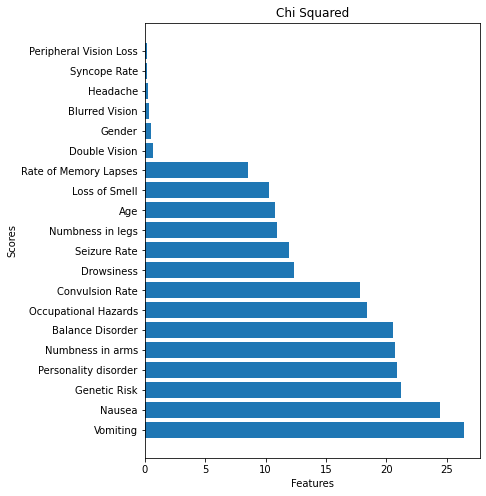

In [44]:
# 
# chi_squared
# 
chi_squared_x = list(chi_squared.keys())
# 
chi_squared_y = list(chi_squared.values())
# 
# Simple Bar Plot
plt.figure(figsize=(6,8))
plt.barh(chi_squared_x, chi_squared_y)
plt.xlabel('Features')
plt.ylabel("Scores")
plt.title('Chi Squared')
plt.show()
# 
# 

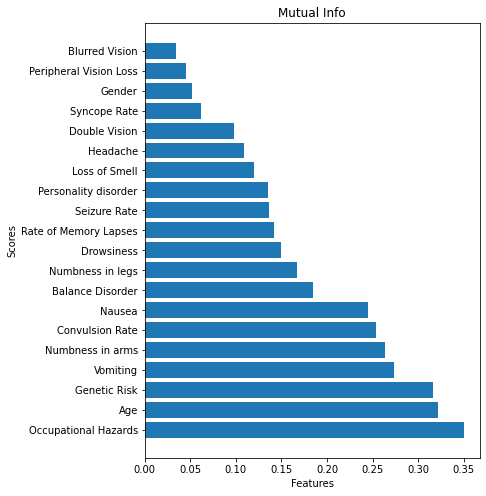

In [45]:
# 
# mutual_info
# 
mutual_info_x = list(mutual_info.keys())
# 
mutual_info_y = list(mutual_info.values())
# 
# Simple Bar Plot
plt.figure(figsize=(6,8))
plt.barh(mutual_info_x, mutual_info_y)
plt.xlabel('Features')
plt.ylabel("Scores")
plt.title('Mutual Info')
plt.show()
# 
# 

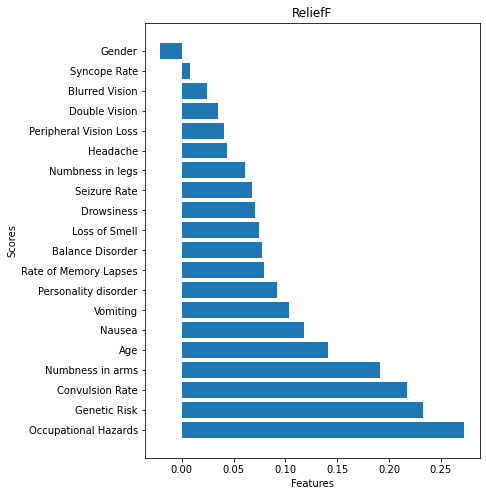

In [46]:
# 
# reliefF
# 
reliefF_x = list(reliefF.keys())
# 
reliefF_y = list(reliefF.values())
# 
# Simple Bar Plot
plt.figure(figsize=(6,8))
plt.barh(reliefF_x, reliefF_y) 
plt.xlabel('Features')
plt.ylabel("Scores")
plt.title('ReliefF')
plt.show()
# 
# 

In [47]:
# 
# 
merge_dicts = merge_dicts([chi_squared, mutual_info, reliefF])
# print(merge_dicts)
#
# merge_dicts
# 
# print(FS1._tabulate(merge_dicts, headers = ['Features', 'Feature Selection values [Chi-Squared, Mutual Info, ReliefF]']))   
# 
# 
fs_df = pd.DataFrame([[k] + v for k, v in merge_dicts.items()],
                    columns=['Features', 'Chi-Squared', 'Mutual Info', 'ReliefF'])
# 
# 
# fs_df.head(5)
fs_df.to_excel("results/FeatureSelectionPhase1Table.xlsx")
# 
# 
# plot grouped bar chart
# fs_df.plot(x='Features',
#         kind='bar',
#         stacked=False,
#         title='Grouped Bar Graph with dataframe')
# 
# 

##### Confusion Matrix

<AxesSubplot:>

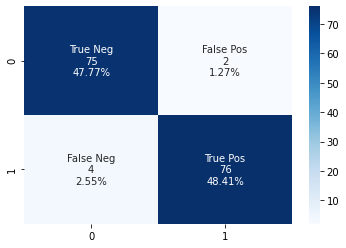

In [48]:
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# SVM
# 
ModelEvaluationAndVisualization(svm_clf, _phase2_fs_y_test, svm_clf.predict(_phase2_fs_X_test)).confusion_matrix()
# 

<AxesSubplot:>

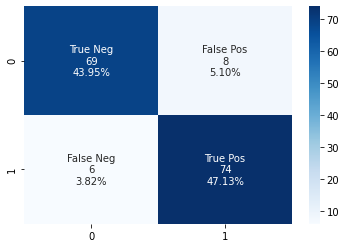

In [49]:
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# DT
# 
ModelEvaluationAndVisualization(dt_clf, _phase2_fs_y_test, dt_clf.predict(_phase2_fs_X_test)).confusion_matrix()
# 

<AxesSubplot:>

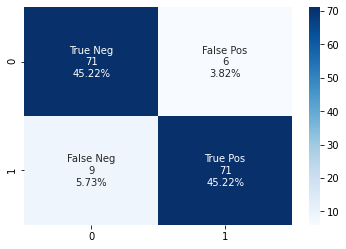

In [50]:
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# MLP
# 
ModelEvaluationAndVisualization(mlp_clf, _phase2_fs_y_test, mlp_clf.predict(_phase2_fs_X_test)).confusion_matrix()
# 

<AxesSubplot:>

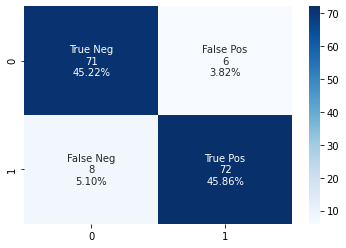

In [51]:
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# KNN
# 
ModelEvaluationAndVisualization(k_neigh_clf, _phase2_fs_y_test, k_neigh_clf.predict(_phase2_fs_X_test)).confusion_matrix()
# 

<AxesSubplot:>

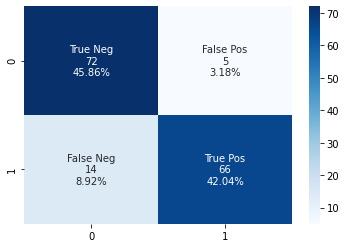

In [52]:
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# Guassian NB
# 
ModelEvaluationAndVisualization(Gauss_NB_clf, _phase2_fs_y_test, Gauss_NB_clf.predict(_phase2_fs_X_test)).confusion_matrix()
# 

<AxesSubplot:>

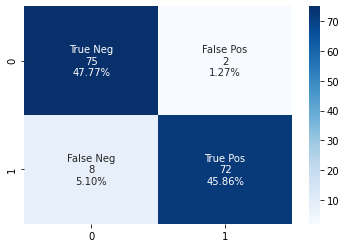

In [53]:
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# Bagging (SVM)
# 
ModelEvaluationAndVisualization(bag_svm_clf, _phase2_fs_y_test, bag_svm_clf.predict(_phase2_fs_X_test)).confusion_matrix()
# 

<AxesSubplot:>

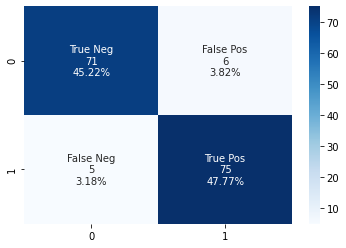

In [54]:
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# Bagging (DT)
# 
ModelEvaluationAndVisualization(bag_dt_clf, _phase2_fs_y_test, bag_dt_clf.predict(_phase2_fs_X_test)).confusion_matrix()
# 

<AxesSubplot:>

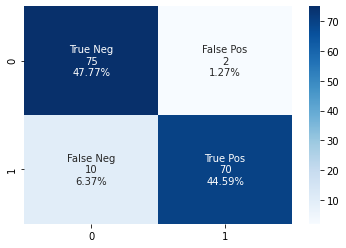

In [55]:
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# Bagging (MLP)
# 
ModelEvaluationAndVisualization(bag_mlp_clf, _phase2_fs_y_test, bag_mlp_clf.predict(_phase2_fs_X_test)).confusion_matrix()
# 

<AxesSubplot:>

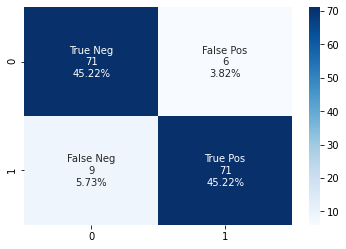

In [56]:
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# Bagging (KNN)
# 
ModelEvaluationAndVisualization(bag_k_neigh_clf, _phase2_fs_y_test, bag_k_neigh_clf.predict(_phase2_fs_X_test)).confusion_matrix()
# 

<AxesSubplot:>

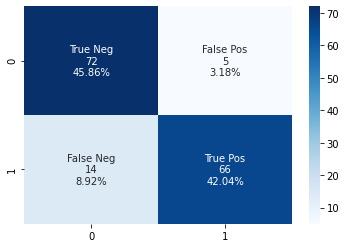

In [57]:
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# Bagging (NB)
# 
ModelEvaluationAndVisualization(bag_Gauss_NB_clf, _phase2_fs_y_test, bag_Gauss_NB_clf.predict(_phase2_fs_X_test)).confusion_matrix()
# 

<AxesSubplot:>

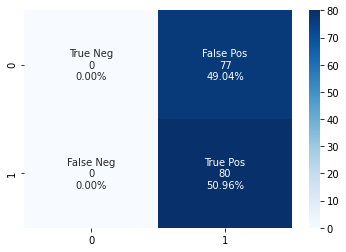

In [58]:
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# Boosting (SVM)
# 
ModelEvaluationAndVisualization(boost_svm_clf, _phase2_fs_y_test, boost_svm_clf.predict(_phase2_fs_X_test)).confusion_matrix()
# 

<AxesSubplot:>

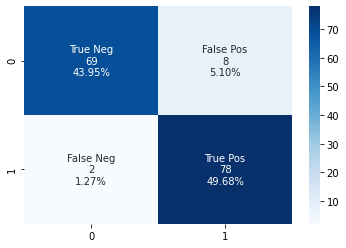

In [59]:
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# Boosting (DT)
# 
ModelEvaluationAndVisualization(boost_dt_clf, _phase2_fs_y_test, boost_dt_clf.predict(_phase2_fs_X_test)).confusion_matrix()
# 

<AxesSubplot:>

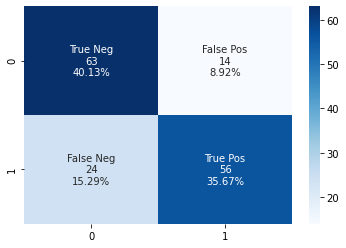

In [60]:
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# Boosting (NB)
# 
ModelEvaluationAndVisualization(boost_Gauss_NB_clf, _phase2_fs_y_test, boost_Gauss_NB_clf.predict(_phase2_fs_X_test)).confusion_matrix()
# 

<AxesSubplot:>

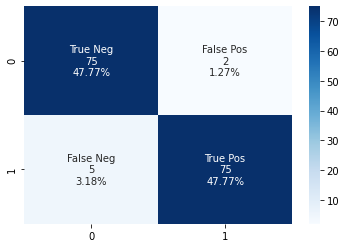

In [61]:
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# Stacking
# 
ModelEvaluationAndVisualization(stacking_clf, _phase2_fs_y_test, stacking_clf.predict(_phase2_fs_X_test)).confusion_matrix()
# 

##### Accuracy

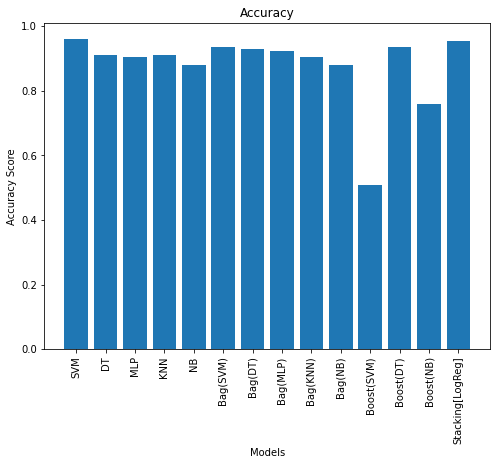

In [62]:
# accuracy_score
# Create Data
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# 
accuracy_score_y = [(ModelEvaluationAndVisualization(model, _phase2_fs_y_test, model.predict(_phase2_fs_X_test)).accuracy_score()) for model in model_clfs]
# 
# Simple Bar Plot
plt.figure(figsize=(8,6))
plt.bar(models_x, accuracy_score_y)
plt.xlabel('Models')
plt.xticks(rotation=90)
plt.ylabel("Accuracy Score")
plt.title('Accuracy')
plt.show()
# 

##### Precision

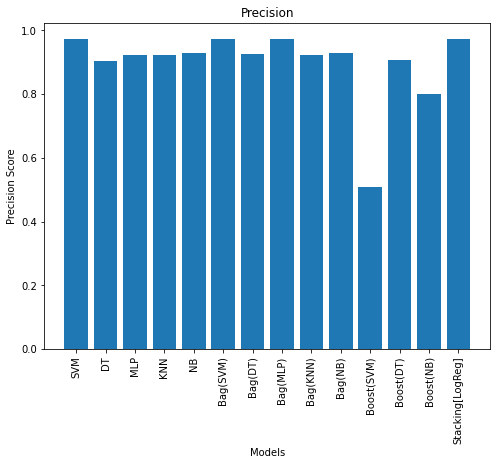

In [63]:
# precision_score
# Create Data
# 
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# 
precision_score_y = [precision_score(_phase2_fs_y_test, model.predict(_phase2_fs_X_test)) for model in model_clfs]
# 
# Simple Bar Plot
plt.figure(figsize=(8,6))
plt.bar(models_x, precision_score_y)
plt.xlabel('Models')
plt.xticks(rotation=90)
plt.ylabel("Precision Score")
plt.title('Precision')
plt.show()
# 

##### Recall

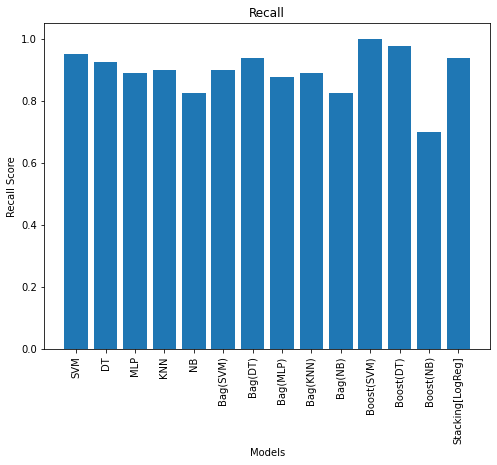

In [64]:
# 
recall_score_y = [recall_score(_phase2_fs_y_test, model.predict(_phase2_fs_X_test)) for model in model_clfs]
# recall_score_y = [svm_clf.score(_phase2_fs_X_test, _phase2_fs_y_test), dt_clf.score(_phase2_fs_X_test, _phase2_fs_y_test), 
#                    mlp_clf.score(_phase2_fs_X_test, _phase2_fs_y_test), k_neigh_clf.score(_phase2_fs_X_test, _phase2_fs_y_test), Gauss_NB_clf.score(_phase2_fs_X_test, _phase2_fs_y_test)]
# recall_score(y_true, y_pred, average=None)
# 
# Simple Bar Plot
plt.figure(figsize=(8,6))
plt.bar(models_x, recall_score_y)
plt.xlabel('Models')
plt.xticks(rotation=90)
plt.ylabel("Recall Score")
plt.title('Recall')
plt.show()

##### AUC (ROC)

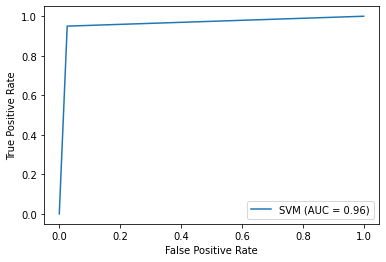

In [65]:
# plot_roc_curve(svm_clf, )
# fpr, tpr, thresholds = roc_curve(y, pred)
# 
svm_fpr, svm_tpr, thresholds = roc_curve(_phase2_fs_y_test, svm_clf.predict(_phase2_fs_X_test))
roc_auc = auc(svm_fpr, svm_tpr)
display = RocCurveDisplay(fpr=svm_fpr, tpr=svm_tpr, roc_auc=roc_auc, estimator_name='SVM')
display.plot()
# 
# 

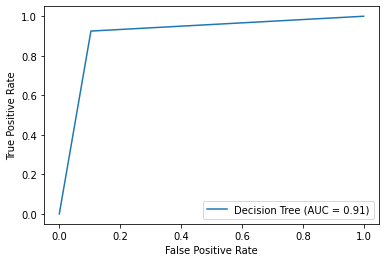

In [66]:
# plot_roc_curve(svm_clf, )
# fpr, tpr, thresholds = roc_curve(y, pred)
# 
dt_fpr, dt_tpr, thresholds = roc_curve(_phase2_fs_y_test, dt_clf.predict(_phase2_fs_X_test))
roc_auc = auc(dt_fpr, dt_tpr)
display = RocCurveDisplay(fpr=dt_fpr, tpr=dt_tpr, roc_auc=roc_auc, estimator_name='Decision Tree')
display.plot()
# 
# 

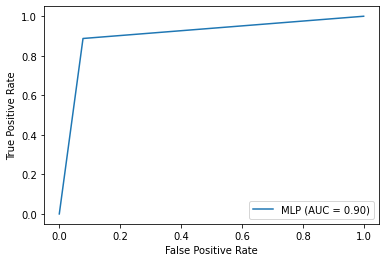

In [67]:
# plot_roc_curve(svm_clf, )
# fpr, tpr, thresholds = roc_curve(y, pred)
# 
mlp_fpr, mlp_tpr, thresholds = roc_curve(_phase2_fs_y_test, mlp_clf.predict(_phase2_fs_X_test))
roc_auc = auc(mlp_fpr, mlp_tpr)
display = RocCurveDisplay(fpr=mlp_fpr, tpr=mlp_tpr, roc_auc=roc_auc, estimator_name='MLP')
display.plot()
# 
# 

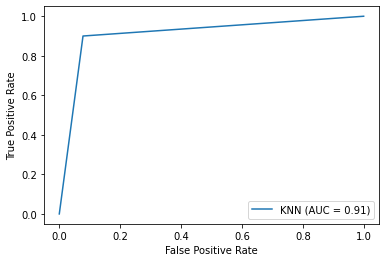

In [68]:
# plot_roc_curve(svm_clf, )
# fpr, tpr, thresholds = roc_curve(y, pred)
# 
k_neigh_fpr, k_neigh_tpr, thresholds = roc_curve(_phase2_fs_y_test, k_neigh_clf.predict(_phase2_fs_X_test))
roc_auc = auc(k_neigh_fpr, k_neigh_tpr)
display = RocCurveDisplay(fpr=k_neigh_fpr, tpr=k_neigh_tpr, roc_auc=roc_auc, estimator_name='KNN')
display.plot()
# 
# 

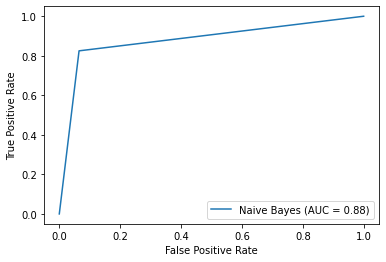

In [69]:
# plot_roc_curve(svm_clf, )
# fpr, tpr, thresholds = roc_curve(y, pred)
# 
Gauss_NB_fpr, Gauss_NB_tpr, thresholds = roc_curve(_phase2_fs_y_test, Gauss_NB_clf.predict(_phase2_fs_X_test))
roc_auc = auc(Gauss_NB_fpr, Gauss_NB_tpr)
display = RocCurveDisplay(fpr=Gauss_NB_fpr, tpr=Gauss_NB_tpr, roc_auc=roc_auc, estimator_name='Naive Bayes')
display.plot()
# 
# 

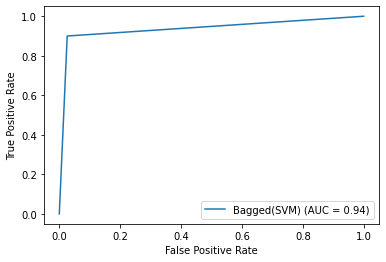

In [70]:
# plot_roc_curve(svm_clf, )
# fpr, tpr, thresholds = roc_curve(y, pred)
# 
bag_svm_fpr, bag_svm_tpr, thresholds = roc_curve(_phase2_fs_y_test, bag_svm_clf.predict(_phase2_fs_X_test))
roc_auc = auc(bag_svm_fpr, bag_svm_tpr)
display = RocCurveDisplay(fpr=bag_svm_fpr, tpr=bag_svm_tpr, roc_auc=roc_auc, estimator_name='Bagged(SVM)')
display.plot()
# 
# 

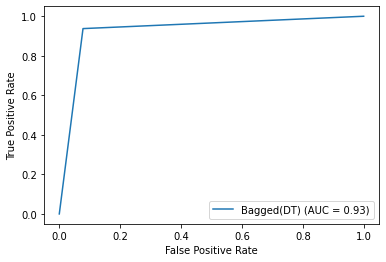

In [71]:
# plot_roc_curve(svm_clf, )
# fpr, tpr, thresholds = roc_curve(y, pred)
# 
bag_dt_fpr, bag_dt_tpr, thresholds = roc_curve(_phase2_fs_y_test, bag_dt_clf.predict(_phase2_fs_X_test))
roc_auc = auc(bag_dt_fpr, bag_dt_tpr)
display = RocCurveDisplay(fpr=bag_dt_fpr, tpr=bag_dt_tpr, roc_auc=roc_auc, estimator_name='Bagged(DT)')
display.plot()
# 
# 

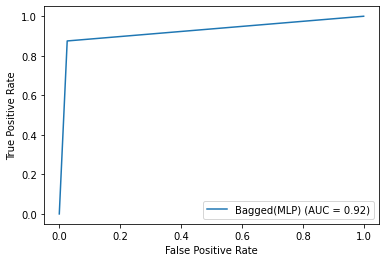

In [72]:
# plot_roc_curve(svm_clf, )
# fpr, tpr, thresholds = roc_curve(y, pred)
# 
bag_mlp_fpr, bag_mlp_tpr, thresholds = roc_curve(_phase2_fs_y_test, bag_mlp_clf.predict(_phase2_fs_X_test))
roc_auc = auc(bag_mlp_fpr, bag_mlp_tpr)
display = RocCurveDisplay(fpr=bag_mlp_fpr, tpr=bag_mlp_tpr, roc_auc=roc_auc, estimator_name='Bagged(MLP)')
display.plot()
# 
# 

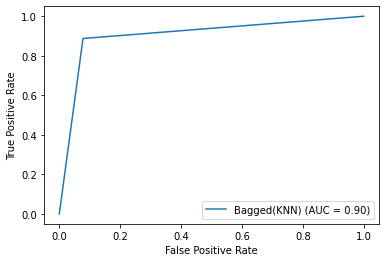

In [73]:
# plot_roc_curve(svm_clf, )
# fpr, tpr, thresholds = roc_curve(y, pred)
# 
bag_k_neigh_fpr, bag_k_neigh_tpr, thresholds = roc_curve(_phase2_fs_y_test, bag_k_neigh_clf.predict(_phase2_fs_X_test))
roc_auc = auc(bag_k_neigh_fpr, bag_k_neigh_tpr)
display = RocCurveDisplay(fpr=bag_k_neigh_fpr, tpr=bag_k_neigh_tpr, roc_auc=roc_auc, estimator_name='Bagged(KNN)')
display.plot()
# 
# 

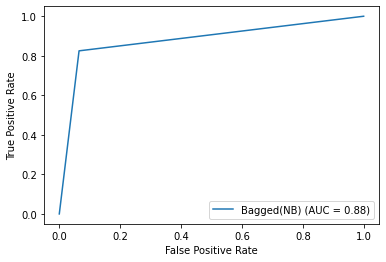

In [74]:
# plot_roc_curve(svm_clf, )
# fpr, tpr, thresholds = roc_curve(y, pred)
# 
bag_Gauss_NB_fpr, bag_Gauss_NB_tpr, thresholds = roc_curve(_phase2_fs_y_test, bag_Gauss_NB_clf.predict(_phase2_fs_X_test))
roc_auc = auc(bag_Gauss_NB_fpr, bag_Gauss_NB_tpr)
display = RocCurveDisplay(fpr=bag_Gauss_NB_fpr, tpr=bag_Gauss_NB_tpr, roc_auc=roc_auc, estimator_name='Bagged(NB)')
display.plot()
# 
# 

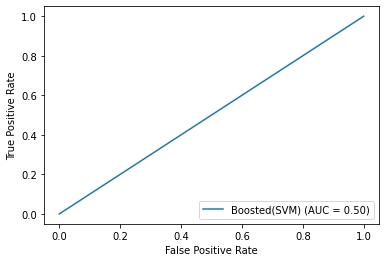

In [75]:
# plot_roc_curve(svm_clf, )
# fpr, tpr, thresholds = roc_curve(y, pred)
# 
boost_svm_fpr, boost_svm_tpr, thresholds = roc_curve(_phase2_fs_y_test, boost_svm_clf.predict(_phase2_fs_X_test))
roc_auc = auc(boost_svm_fpr, boost_svm_tpr)
display = RocCurveDisplay(fpr=boost_svm_fpr, tpr=boost_svm_tpr, roc_auc=roc_auc, estimator_name='Boosted(SVM)')
display.plot()
# 
# 

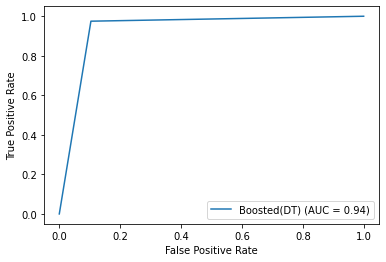

In [76]:
# plot_roc_curve(svm_clf, )
# fpr, tpr, thresholds = roc_curve(y, pred)
# 
boost_dt_fpr, boost_dt_tpr, thresholds = roc_curve(_phase2_fs_y_test, boost_dt_clf.predict(_phase2_fs_X_test))
roc_auc = auc(boost_dt_fpr, boost_dt_tpr)
display = RocCurveDisplay(fpr=boost_dt_fpr, tpr=boost_dt_tpr, roc_auc=roc_auc, estimator_name='Boosted(DT)')
display.plot()
# 
# 

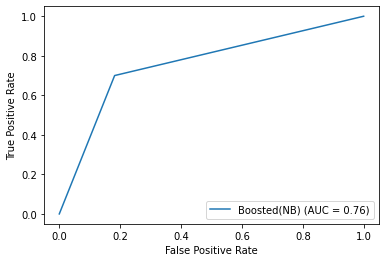

In [77]:
# plot_roc_curve(svm_clf, )
# fpr, tpr, thresholds = roc_curve(y, pred)
# 
boost_Gauss_NB_fpr, boost_Gauss_NB_tpr, thresholds = roc_curve(_phase2_fs_y_test, boost_Gauss_NB_clf.predict(_phase2_fs_X_test))
roc_auc = auc(boost_Gauss_NB_fpr, boost_Gauss_NB_tpr)
display = RocCurveDisplay(fpr=boost_Gauss_NB_fpr, tpr=boost_Gauss_NB_tpr, roc_auc=roc_auc, estimator_name='Boosted(NB)')
display.plot()
# 
# 

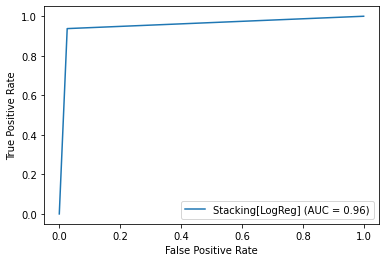

In [78]:
# plot_roc_curve(svm_clf, )
# fpr, tpr, thresholds = roc_curve(y, pred)
# 
stacking_fpr, stacking_tpr, thresholds = roc_curve(_phase2_fs_y_test, stacking_clf.predict(_phase2_fs_X_test))
roc_auc = auc(stacking_fpr, stacking_tpr)
display = RocCurveDisplay(fpr=stacking_fpr, tpr=stacking_tpr, roc_auc=roc_auc, estimator_name='Stacking[LogReg]')
display.plot()
# 
# 

##### Sensitivity

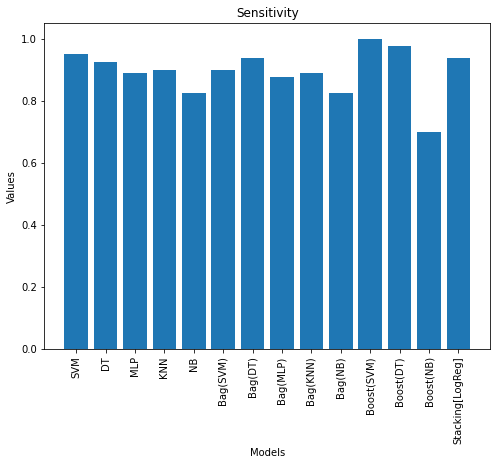

In [79]:
# Sensitivity (True Positive Rate) refers to the probability of a positive test, 
# conditioned on truly having the condition (or tested positive by the `Gold Standard test` 
# if the true condition can not be known).
# Sensitivity (TPR) = 1 - FNR
#  
# 
models_tpr = [svm_tpr, dt_tpr, mlp_tpr, k_neigh_tpr, Gauss_NB_tpr, bag_svm_tpr, bag_dt_tpr, bag_mlp_tpr, bag_k_neigh_tpr, bag_Gauss_NB_tpr, boost_svm_tpr, boost_dt_tpr, boost_Gauss_NB_tpr, stacking_tpr]
# 
sensitivity_y = [model_tpr[1] for model_tpr in models_tpr] 
# 

# Simple Bar Plot
plt.figure(figsize=(8,6))
plt.bar(models_x, sensitivity_y)
plt.xlabel('Models')
plt.xticks(rotation=90)
plt.ylabel("Values")
plt.title('Sensitivity')
plt.show()

##### Specificity

In [80]:
def specificity(fpr):
    """
        Specificity (True Negative Rate) refers to the probability of a negative test, 
        provided one does not have the condition (judged negative by the `Gold Standard`).
        
        Fomula => Specificity(TNR) = 1 - FPR
    """
    return 1 - fpr

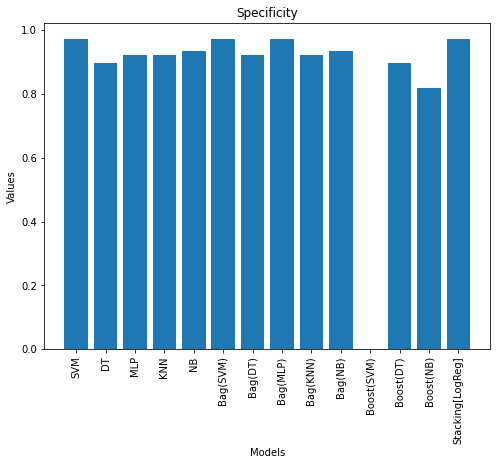

In [81]:
# 
# models_fpr = [svm_fpr, dt_fpr, mlp_fpr, k_neigh_fpr, Gauss_NB_fpr]
models_fpr = [svm_fpr, dt_fpr, mlp_fpr, k_neigh_fpr, Gauss_NB_fpr, bag_svm_fpr, bag_dt_fpr, bag_mlp_fpr, bag_k_neigh_fpr, bag_Gauss_NB_fpr, boost_svm_fpr, boost_dt_fpr, boost_Gauss_NB_fpr, stacking_fpr]
specificity_y = [specificity(model_fpr[1]) for model_fpr in models_fpr] 
# 

# Simple Bar Plot
plt.figure(figsize=(8,6))
plt.bar(models_x, specificity_y)
plt.xlabel('Models')
plt.xticks(rotation=90)
plt.ylabel("Values")
plt.title('Specificity')
plt.show()

##### Box plot [base & ensemble models]

In [82]:
# 
# Accuracy of five base learners
# Y = accuracy score
# X = names of learners
# 
# 
model_clfs = [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf] 
# 
# 
CV = 5
models_accuracies = {}
# 
for model_clf in model_clfs:
    models_accuracies[models_x[model_clfs.index(model_clf)]] = cross_val_score(model_clf, _phase2_fs_X_train, _phase2_fs_y_train, scoring ='accuracy', cv=CV)

# 
boxplot_df = pd.DataFrame(data=np.rot90(list(models_accuracies.values())), columns=list(models_accuracies.keys()))
# 
boxplot_df
# boxplot_df.plot.box(title='Boxplot with pandas');
# 
# 

,SVM,DT,MLP,KNN,NB,Bag(SVM),Bag(DT),Bag(MLP),Bag(KNN),Bag(NB),Boost(SVM),Boost(DT),Boost(NB),Stacking[LogReg]
0,0.975610,0.878049,0.902439,0.975610,0.902439,0.926829,0.951220,0.975610,0.951220,0.902439,0.487805,0.902439,0.463415,0.926829
1,0.926829,0.853659,0.829268,0.902439,0.804878,0.902439,0.926829,0.926829,0.878049,0.804878,0.512195,0.853659,0.512195,0.951220
2,0.975610,0.951220,0.902439,0.951220,0.878049,0.951220,0.951220,0.902439,0.951220,0.878049,0.512195,0.951220,0.512195,0.951220
3,0.853659,0.878049,0.756098,0.853659,0.731707,0.829268,0.878049,0.829268,0.853659,0.731707,0.512195,0.878049,0.731707,0.878049
4,0.976190,0.928571,0.809524,0.904762,0.904762,0.952381,0.928571,0.928571,0.880952,0.904762,0.500000,0.857143,0.500000,0.976190


In [83]:
boxplot_df.to_excel("results/AccuraciesTable.xlsx")
# 

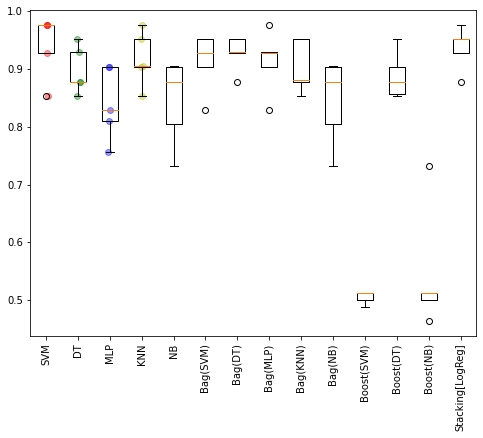

In [84]:
# 
# 
vals, names, xs = [],[],[]
for i, col in enumerate(boxplot_df.columns):
    vals.append(boxplot_df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, boxplot_df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted
# 
# 
# 
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
plt.boxplot(vals, labels=names)
palette = ['r', 'g', 'b', 'y']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, color=c)
plt.show()
# 
# 

## Docs

In [85]:
# # Create Data
# x=['A','B','C','D','E','F','G','H','I','J']
# y = np.random.randint(low=0, high=100, size=10)
# 
# # Simple Bar Plot
# plt.bar(x,y)
# plt.xlabel('Categories')
# plt.ylabel("Values")
# plt.title('Categories Bar Plot')
# plt.show()
# 
# 
# https://towardsdatascience.com/the-eda-theoretical-guide-b7cef7653f0d
# https://towardsdatascience.com/14-data-visualization-plots-of-seaborn-14a7bdd16cd7
# https://en.wikipedia.org/wiki/Sensitivity_and_specificity
# 
# 